# **Truy cập trang wed để craw **


In [ ]:
import requests

In [ ]:
url = 'https://pokemondb.net/pokedex/all'

In [ ]:
req = requests.get(url)

In [ ]:
print(req)

<Response [200]>


In [ ]:
type(req)

requests.models.Response

In [ ]:
req.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<title>Pok\xc3\xa9mon Pok\xc3\xa9dex: list of Pok\xc3\xa9mon with stats | Pok\xc3\xa9mon Database</title>\n<link rel="preconnect" href="https://img.pokemondb.net">\n<link rel="preconnect" href="https://s.pokemondb.net">\n<link rel="preload" href="/static/fonts/fira-sans-v17-latin-400.woff2" as="font" type="font/woff2" crossorigin>\n<link rel="preload" href="/static/fonts/fira-sans-v17-latin-400i.woff2" as="font" type="font/woff2" crossorigin>\n<link rel="preload" href="/static/fonts/fira-sans-v17-latin-600.woff2" as="font" type="font/woff2" crossorigin>\n<link rel="stylesheet" href="/static/css/pokemondb-ebd6c5d43a.css">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<meta property="og:description" name="description" content="The Pok\xc3\xa9dex contains detailed stats for every creature from the Pok\xc3\xa9mon games, up to and including the latest Scarlet/Violet games.">\n<link rel="canonical" 

# **Cài đặt beautifulsoup để cấu trúc lại dữ liệu**

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(req.content, "lxml")

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Pokémon Pokédex: list of Pokémon with stats | Pokémon Database
  </title>
  <link href="https://img.pokemondb.net" rel="preconnect"/>
  <link href="https://s.pokemondb.net" rel="preconnect"/>
  <link as="font" crossorigin="" href="/static/fonts/fira-sans-v17-latin-400.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/static/fonts/fira-sans-v17-latin-400i.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/static/fonts/fira-sans-v17-latin-600.woff2" rel="preload" type="font/woff2"/>
  <link href="/static/css/pokemondb-ebd6c5d43a.css" rel="stylesheet"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="The Pokédex contains detailed stats for every creature from the Pokémon games, up to and including the latest Scarlet/Violet games." name="description" property="og:description"/>
  <link href="https://pokemondb.n

In [ ]:
events = soup.find('table', attrs={"class": "data-table sticky-header block-wide"}).findAll('tr')

In [ ]:
events

[<tr>
 <th class="sorting" data-sort="int"><div class="sortwrap">#</div></th> <th class="sorting" data-sort="string"><div class="sortwrap">Name</div></th> <th><div class="sortwrap">Type</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Total</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">HP</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Attack</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Defense</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Atk</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Def</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Speed</div></th> </tr>,
 <tr>
 <td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><img alt="Bulbasaur" class="img-fixed icon-pkmn" height="42" loading="lazy" src="https://img.pokemondb.net/sprites/sword-shield/icon/bulbasaur.png" width="56"/></span><span cla

In [ ]:
import pandas as pd

data = []
for event in events:
    details = {}
    name = event.find('a', attrs={"class": "ent-name"})
    if name is not None and name.has_attr('href'):
        details['Name'] = name.text
    types = event.find('a', attrs={"class": "type-icon"})
    if types is not None and types.has_attr('href'):
        details['Type'] = types.text
    type_mega = event.find('small', attrs={"class": "text-muted"})
    if type_mega:
        details['hasMegaEvolution'] = type_mega.text
    frame = event.find_all('td', attrs={"class": "cell-num"})
    details['Frame'] = [fra.text for fra in frame]
    data.append(details)

df = pd.DataFrame(data)
df

# Truy cập vào trang web để lấy dữ liệu cần thiết


Frame          Name      Type  \
0                                           []           NaN       NaN   
1          [0001, 318, 45, 49, 49, 65, 65, 45]     Bulbasaur     Grass   
2          [0002, 405, 60, 62, 63, 80, 80, 60]       Ivysaur     Grass   
3        [0003, 525, 80, 82, 83, 100, 100, 80]      Venusaur     Grass   
4      [0003, 625, 80, 100, 123, 122, 120, 80]      Venusaur     Grass   
...                                        ...           ...       ...   
1191    [1006, 590, 74, 130, 90, 120, 60, 116]  Iron Valiant     Fairy   
1192  [1007, 670, 100, 135, 115, 85, 100, 135]      Koraidon  Fighting   
1193  [1008, 670, 100, 85, 100, 135, 115, 135]      Miraidon  Electric   
1194     [1009, 590, 99, 83, 91, 125, 83, 109]  Walking Wake     Water   
1195    [1010, 590, 90, 130, 88, 70, 108, 104]   Iron Leaves     Grass   

     hasMegaEvolution  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4       Mega Venusaur  
...               ...  
1191              NaN  
1192              NaN  
1193              NaN  
1194              NaN  
1195              NaN  

[1196 rows x 4 columns]

In [ ]:
eleme_df = pd.DataFrame(df['Frame'].tolist())
eleme_df = eleme_df.rename(columns={0: 'STD', 1: 'Total', 2: 'HP', 3: 'Attack', 4: 'Defense', 5: 'Sp_Atk', 6: 'Sp_Def', 7: 'Speed'})
df = pd.concat([df, eleme_df], axis=1)
df.drop('Frame', axis=1, inplace=True)

# Tách cột Frame và thay đổi tên cho các cột thông số chiến đấu của pokemon

In [ ]:
df

Name      Type hasMegaEvolution   STD Total    HP Attack  \
0              NaN       NaN              NaN  None  None  None   None   
1        Bulbasaur     Grass              NaN  0001   318    45     49   
2          Ivysaur     Grass              NaN  0002   405    60     62   
3         Venusaur     Grass              NaN  0003   525    80     82   
4         Venusaur     Grass    Mega Venusaur  0003   625    80    100   
...            ...       ...              ...   ...   ...   ...    ...   
1191  Iron Valiant     Fairy              NaN  1006   590    74    130   
1192      Koraidon  Fighting              NaN  1007   670   100    135   
1193      Miraidon  Electric              NaN  1008   670   100     85   
1194  Walking Wake     Water              NaN  1009   590    99     83   
1195   Iron Leaves     Grass              NaN  1010   590    90    130   

     Defense Sp_Atk Sp_Def Speed  
0       None   None   None  None  
1         49     65     65    45  
2         63     80     80    60  
3         83    100    100    80  
4        123    122    120    80  
...      ...    ...    ...   ...  
1191      90    120     60   116  
1192     115     85    100   135  
1193     100    135    115   135  
1194      91    125     83   109  
1195      88     70    108   104  

[1196 rows x 11 columns]

In [ ]:
df = df.drop(index=0)
df = df.drop(columns=['STD'])

In [ ]:
df

Name      Type hasMegaEvolution Total   HP Attack Defense  \
1        Bulbasaur     Grass              NaN   318   45     49      49   
2          Ivysaur     Grass              NaN   405   60     62      63   
3         Venusaur     Grass              NaN   525   80     82      83   
4         Venusaur     Grass    Mega Venusaur   625   80    100     123   
5       Charmander      Fire              NaN   309   39     52      43   
...            ...       ...              ...   ...  ...    ...     ...   
1191  Iron Valiant     Fairy              NaN   590   74    130      90   
1192      Koraidon  Fighting              NaN   670  100    135     115   
1193      Miraidon  Electric              NaN   670  100     85     100   
1194  Walking Wake     Water              NaN   590   99     83      91   
1195   Iron Leaves     Grass              NaN   590   90    130      88   

     Sp_Atk Sp_Def Speed  
1        65     65    45  
2        80     80    60  
3       100    100    80  
4       122    120    80  
5        60     50    65  
...     ...    ...   ...  
1191    120     60   116  
1192     85    100   135  
1193    135    115   135  
1194    125     83   109  
1195     70    108   104  

[1195 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 1 to 1195
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1195 non-null   object
 1   Type              1195 non-null   object
 2   hasMegaEvolution  223 non-null    object
 3   Total             1195 non-null   object
 4   HP                1195 non-null   object
 5   Attack            1195 non-null   object
 6   Defense           1195 non-null   object
 7   Sp_Atk            1195 non-null   object
 8   Sp_Def            1195 non-null   object
 9   Speed             1195 non-null   object
dtypes: object(10)
memory usage: 93.5+ KB


In [ ]:
df['hasMegaEvolution'].value_counts()

Female                4
Male                  4
Incarnate Forme       4
Therian Forme         4
Origin Forme          3
                     ..
Galarian Zigzagoon    1
Galarian Linoone      1
Mega Gardevoir        1
Mega Sableye          1
Roaming Form          1
Name: hasMegaEvolution, Length: 201, dtype: int64

In [ ]:
df['hasMegaEvolution'] = df['hasMegaEvolution'].apply(lambda x: 1 if isinstance(x, str) and 'Mega' in x else 0)

# trong cột Has Mega có hàng nào có kí tự là Mega thì sẽ chuyển thành 1 còn lại chuyển thành 0

In [ ]:
df['hasMegaEvolution'].value_counts()

0    1147
1      48
Name: hasMegaEvolution, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 1 to 1195
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1195 non-null   object
 1   Type              1195 non-null   object
 2   hasMegaEvolution  1195 non-null   int64 
 3   Total             1195 non-null   object
 4   HP                1195 non-null   object
 5   Attack            1195 non-null   object
 6   Defense           1195 non-null   object
 7   Sp_Atk            1195 non-null   object
 8   Sp_Def            1195 non-null   object
 9   Speed             1195 non-null   object
dtypes: int64(1), object(9)
memory usage: 93.5+ KB


In [ ]:
df['Total'] = df['Total'].astype(int)
df['HP'] = df['HP'].astype(int)
df['Attack'] = df['Attack'].astype(int)
df['Defense'] = df['Defense'].astype(int)
df['Sp_Atk'] = df['Sp_Atk'].astype(int)
df['Sp_Def'] = df['Sp_Def'].astype(int)
df['Speed'] = df['Speed'].astype(int)
# Định dạng của các cột thông số chiến đấu của pokemon đều là object nên chuyển về định dạng int

In [ ]:
# # duplicate_names = df[df.duplicated(subset='Name', keep=False)]
# df.loc[duplicate_names.index, 'hasMegaEvolution'] = 1

In [ ]:
# # duplicate_rows = df[df.duplicated(subset='Name', keep=False)]
# print(duplicate_rows)

In [ ]:
# df = df.drop_duplicates(subset='Name', keep='first')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 1 to 1195
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1195 non-null   object
 1   Type              1195 non-null   object
 2   hasMegaEvolution  1195 non-null   int64 
 3   Total             1195 non-null   int64 
 4   HP                1195 non-null   int64 
 5   Attack            1195 non-null   int64 
 6   Defense           1195 non-null   int64 
 7   Sp_Atk            1195 non-null   int64 
 8   Sp_Def            1195 non-null   int64 
 9   Speed             1195 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 93.5+ KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
from matplotlib.gridspec import GridSpec
color_scheme = px.colors.qualitative.T10


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# EDA, Phân tích dữ liệu**

In [ ]:
df.describe()

hasMegaEvolution        Total           HP       Attack      Defense  \
count       1195.000000  1195.000000  1195.000000  1195.000000  1195.000000   
mean           0.040167   441.302092    70.918828    80.939749    74.625105   
std            0.196434   121.009420    26.878116    32.114270    30.693902   
min            0.000000   175.000000     1.000000     5.000000     5.000000   
25%            0.000000   330.000000    52.000000    56.000000    51.500000   
50%            0.000000   461.000000    70.000000    80.000000    70.000000   
75%            0.000000   520.000000    85.000000   100.000000    90.000000   
max            1.000000  1125.000000   255.000000   190.000000   250.000000   

            Sp_Atk       Sp_Def        Speed  
count  1195.000000  1195.000000  1195.000000  
mean     72.933054    72.117992    69.767364  
std      32.738068    27.617608    30.192561  
min      10.000000    20.000000     5.000000  
25%      50.000000    50.000000    45.000000  
50%      65.000000    70.000000    67.000000  
75%      95.000000    90.000000    90.500000  
max     194.000000   250.000000   200.000000

In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


hasMegaEvolution     Total        HP    Attack   Defense  \
hasMegaEvolution          1.000000  0.298413  0.055821  0.288615  0.210028   
Total                     0.298413  1.000000  0.655602  0.731659  0.636404   
HP                        0.055821  0.655602  1.000000  0.461928  0.325716   
Attack                    0.288615  0.731659  0.461928  1.000000  0.468621   
Defense                   0.210028  0.636404  0.325716  0.468621  1.000000   
Sp_Atk                    0.252943  0.720565  0.352312  0.334724  0.226090   
Sp_Def                    0.203526  0.719075  0.388332  0.270554  0.532960   
Speed                     0.165386  0.560025  0.177698  0.370738  0.012986   

                    Sp_Atk    Sp_Def     Speed  
hasMegaEvolution  0.252943  0.203526  0.165386  
Total             0.720565  0.719075  0.560025  
HP                0.352312  0.388332  0.177698  
Attack            0.334724  0.270554  0.370738  
Defense           0.226090  0.532960  0.012986  
Sp_Atk            1.000000  0.517234  0.431030  
Sp_Def            0.517234  1.000000  0.231154  
Speed             0.431030  0.231154  1.000000

<ipython-input-28-663157c45d4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(1)
<ipython-input-28-663157c45d4c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')


<Axes: >

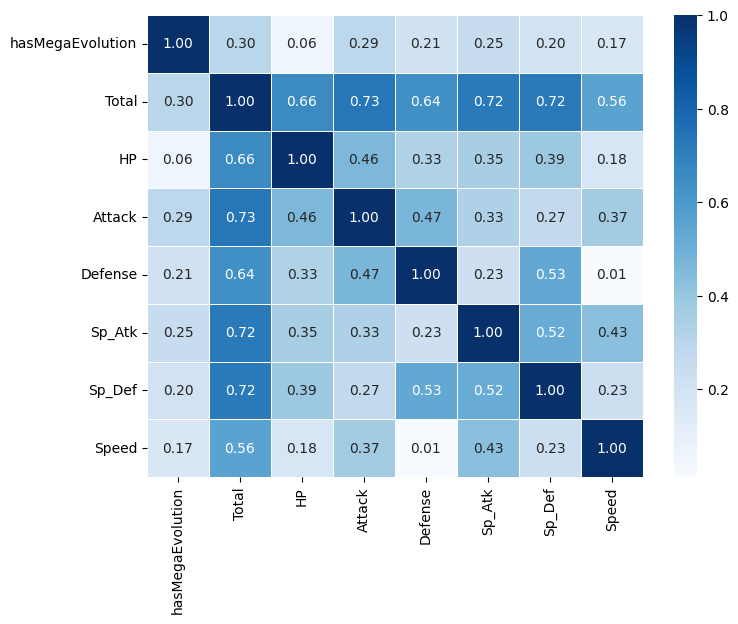

In [ ]:
corr = df.corr().round(1)
plt.figure(figsize=(8, 6))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')

# Nhận thấy dữ liệu của cột Total hầu như tương quan hết với dữ liệu các của các cột thông số chiến đấu của pokemon, nên có thể loại df.corr mà không dùng cột này để theo dõi thuận tiện hơn

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


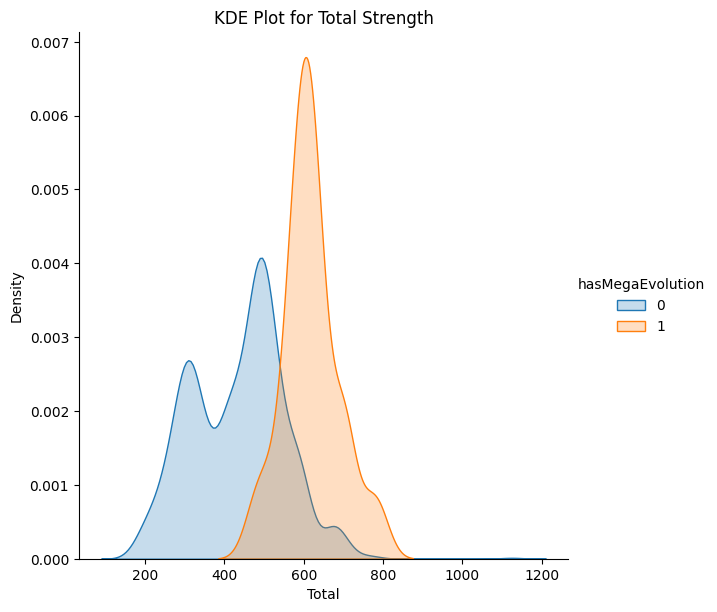

In [ ]:
sns.FacetGrid(df, hue="hasMegaEvolution", height=6,).map(sns.kdeplot, "Total",shade=True).add_legend()
plt.title('KDE Plot for Total Strength')
plt.show()

# Thấy biểu đồ phân bố có sự khác biệt rõ giữa pokemon có Mega và không có Mega. vs pokemon không có mega thì lại
#chia làm 2 nhóm, 1 nhóm có sức mạnh cao hơn và sức mạnh yếu hơn

In [ ]:


type_counts = df['Type'].value_counts()
total_count = type_counts.sum()
percentage = (type_counts / total_count) * 100

fig = px.bar(x=percentage.index, y=percentage.values, color=percentage.index,
             color_discrete_sequence=px.colors.qualitative.Pastel, text=percentage.values, title='Type')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(
    xaxis_title="Type",
    yaxis_title="Percentage",
    template='simple_white'
)
fig.show()

# CÓ 3 nhóm đầu là water, Normal và Grass chiến nhiều nhất tầm 30% còn lại là các nhóm theo sau như Fire, Rock, và sau cùng là Fariry và Flyin

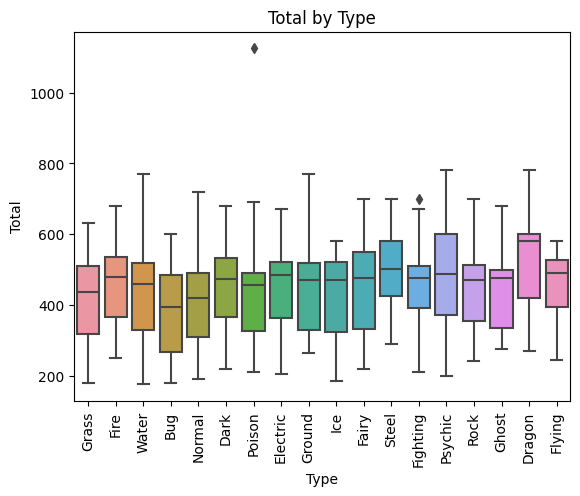

In [ ]:
# Biểu dồ Type theo total thấy Hệ steel vs hệ Dragon có chỉ số cao hơn so với các hệ còn lại, mặc dù chiếm khá ít trong thế giới pokemon

sns.boxplot(data=df, x='Type', y='Total')
plt.title('Total by Type')
plt.xticks(rotation=90)
plt.show()

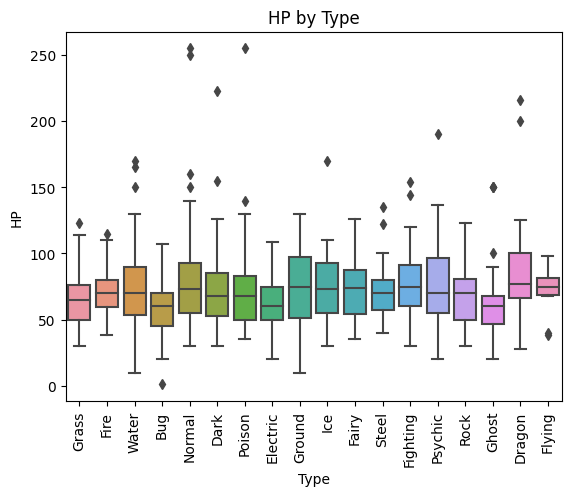

In [ ]:
# Biểu dồ Type theo Speed thấy Hệ Normal, Psyhic, có chỉ số cáo hơn so với các nhóm khác

sns.boxplot(data=df, x='Type', y='HP')
plt.title('HP by Type')
plt.xticks(rotation=90)
plt.show()

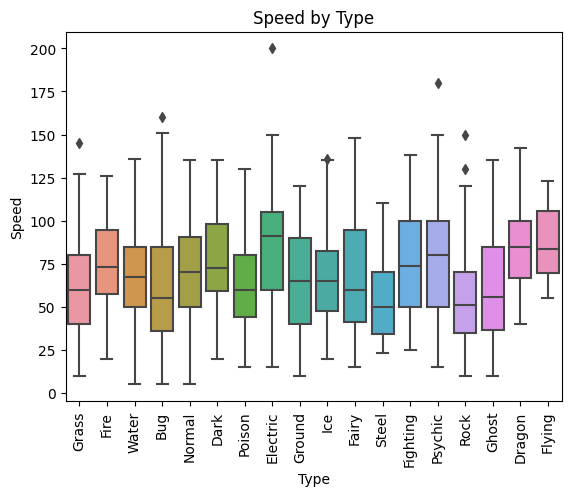

In [ ]:
sns.boxplot(data=df, x='Type', y='Speed')
plt.title('Speed by Type')
plt.xticks(rotation=90)
plt.show()

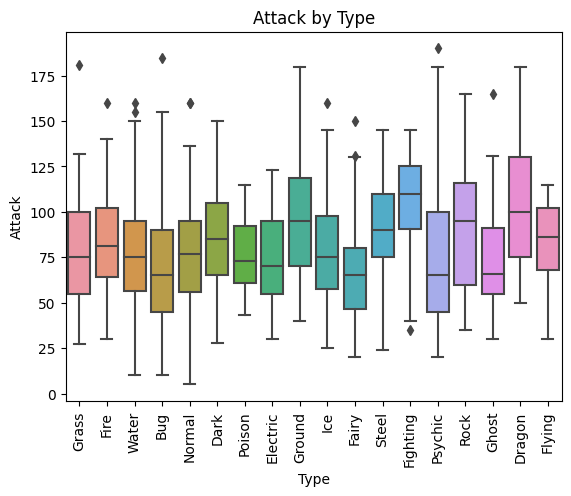

In [ ]:
sns.boxplot(data=df, x='Type', y='Attack')
plt.title('Attack by Type')
plt.xticks(rotation=90)
plt.show()

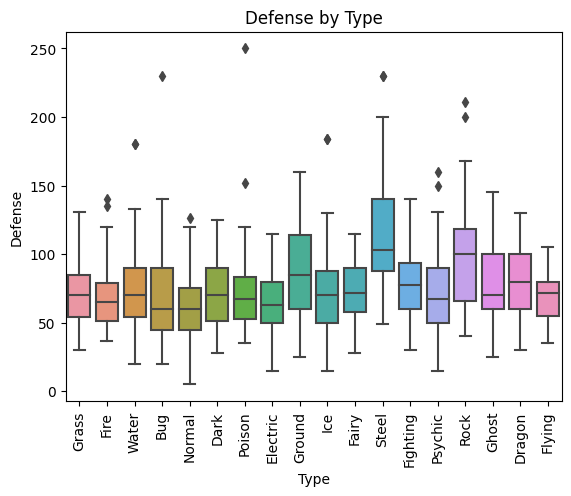

In [ ]:
sns.boxplot(data=df, x='Type', y='Defense')
plt.title('Defense by Type')
plt.xticks(rotation=90)
plt.show()

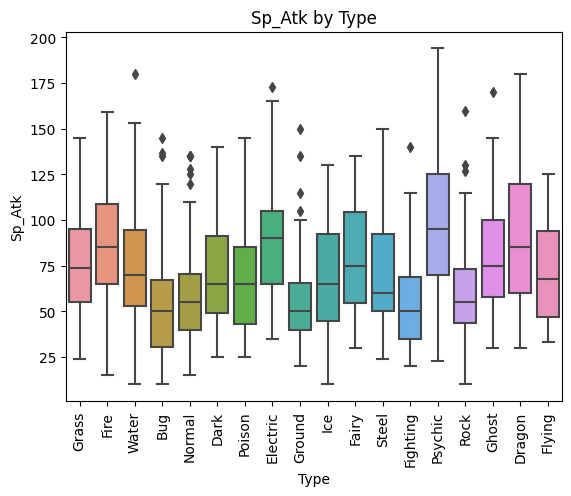

In [ ]:
sns.boxplot(data=df, x='Type', y='Sp_Atk')
plt.title('Sp_Atk by Type')
plt.xticks(rotation=90)
plt.show()

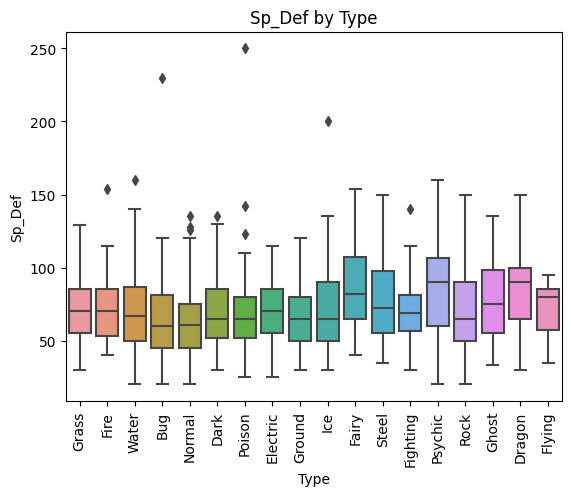

In [ ]:
sns.boxplot(data=df, x='Type', y='Sp_Def')
plt.title('Sp_Def by Type')
plt.xticks(rotation=90)
plt.show()

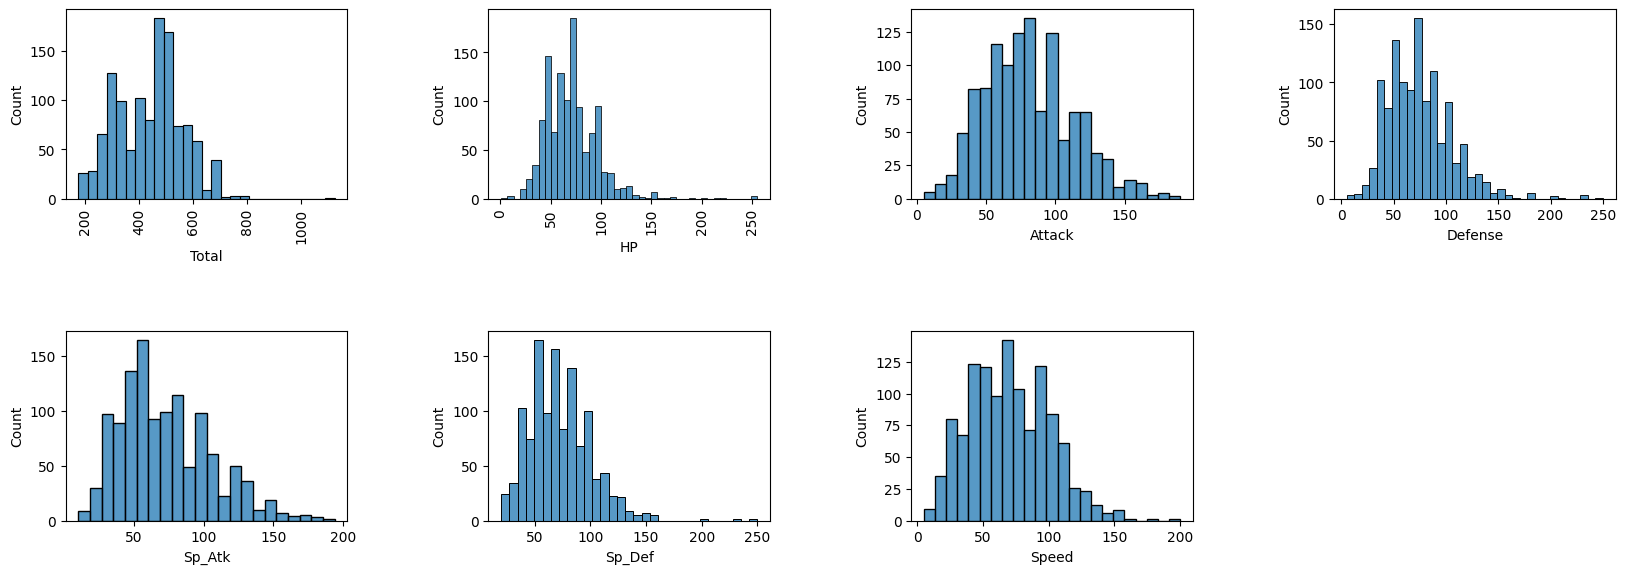

In [ ]:
plt.figure(figsize = (20, 15))

plt.subplot(4, 4, 1)
sns.histplot(x = df['Total'], kde = False)
plt.xticks(rotation=90)


plt.subplot(4, 4, 2)
sns.histplot(x = df['HP'], kde = False)
plt.xticks(rotation=90)

plt.subplot(4, 4, 3)
sns.histplot(x = df['Attack'], kde = False)

plt.subplot(4, 4, 4)
sns.histplot(x = df['Defense'], kde = False)

plt.subplot(4, 4, 5)
sns.histplot(x = df['Sp_Atk'], kde = False)

plt.subplot(4, 4, 6)
sns.histplot(x = df['Sp_Def'], kde = False)

plt.subplot(4, 4, 7)
sns.histplot(x = df['Speed'], kde = False)

plt.subplots_adjust(hspace=0.7, wspace=0.5)

# Nhận thấy biểu đồ phân phối không được đều ở các cột, có cả dữ liệu out lier so với phần còn lại

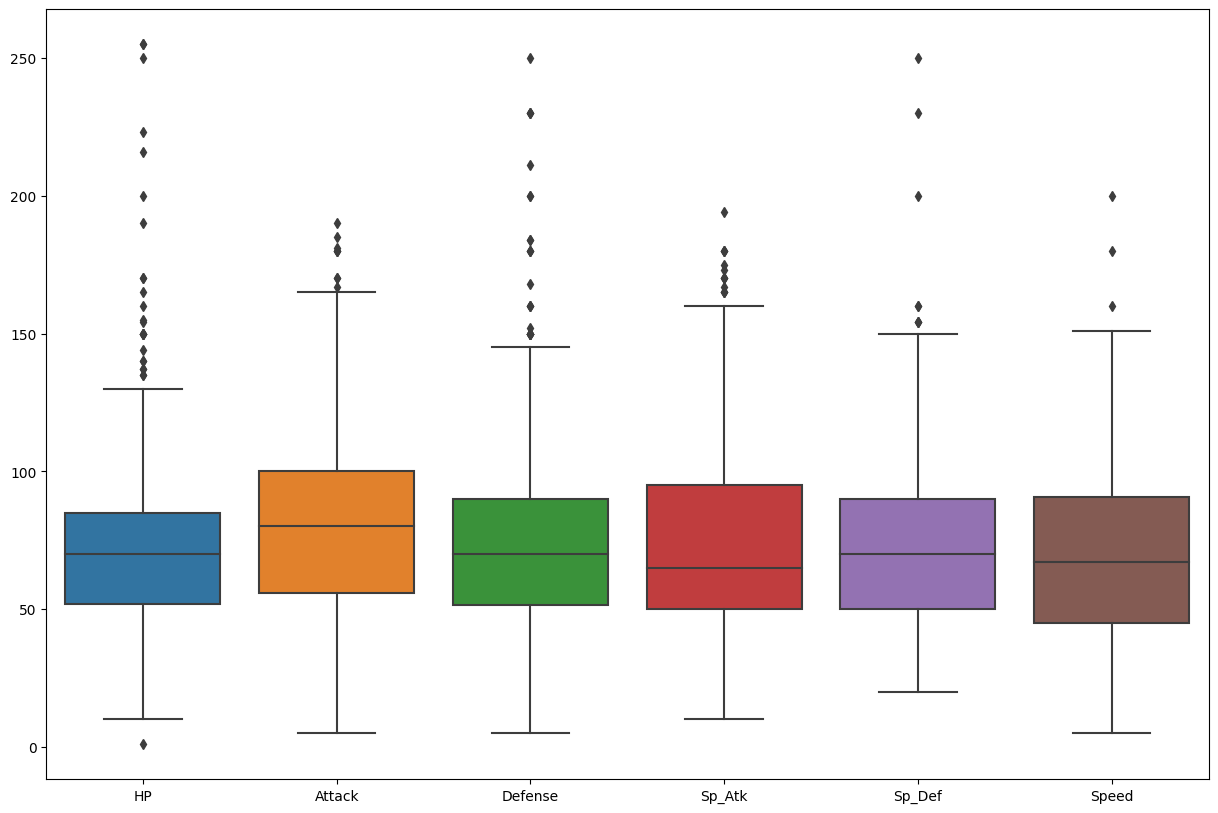

In [ ]:
stats_df = df.drop(['Total', 'Type', 'Name','hasMegaEvolution'], axis=1)
plt.figure(figsize=(15,10))
sns.boxplot(data=stats_df)
plt.show()

#Nhìn chung thì thấy phân bố dữ chung thì có Attach cao hơn so với mặt bằng chung 1 chút

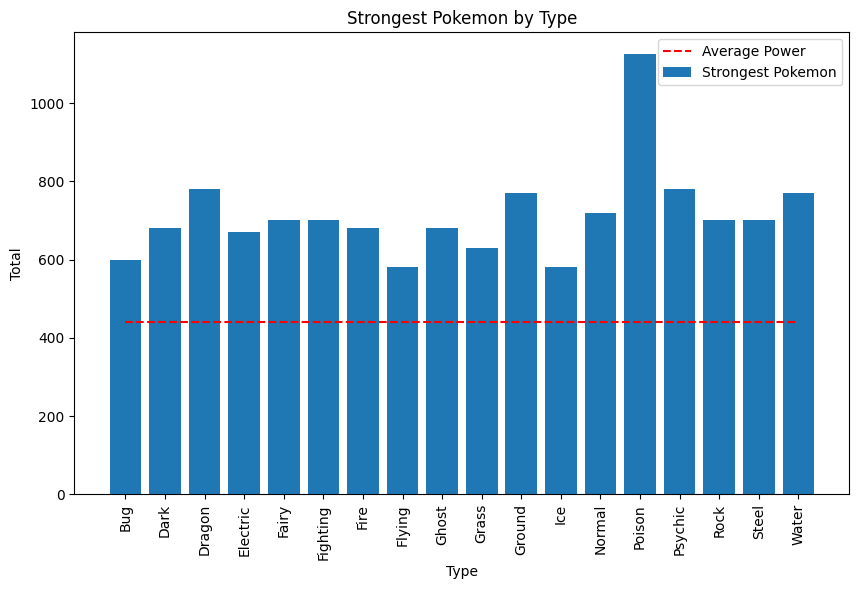

In [ ]:
average_power = df['Total'].mean()
strongest_pokemon = df.groupby('Type')['Total'].max()
types = strongest_pokemon.index.tolist()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(types, strongest_pokemon, label='Strongest Pokemon')
ax.plot([0, len(types)-1], [average_power, average_power], color='red', linestyle='--', label='Average Power')

ax.set_title('Strongest Pokemon by Type')
ax.set_xlabel('Type')
ax.set_ylabel('Total')

plt.xticks(rotation=90)
ax.legend()
plt.show()

# Sức mạnh của các pokemon mạnh nhất ở mỗi hệ so với trung bình

In [ ]:
top_10_strongest_pokemon = df.nlargest(10, 'Total')
print(top_10_strongest_pokemon[['Name', 'Total']])

           Name  Total
1059  Eternatus   1125
202      Mewtwo    780
203      Mewtwo    780
476    Rayquaza    780
472      Kyogre    770
474     Groudon    770
962    Necrozma    754
606      Arceus    720
866     Zygarde    708
313   Tyranitar    700


In [ ]:
strongest_pokemon = df.groupby('Type')['Total'].idxmax()
strongest_pokemon_info = df.loc[strongest_pokemon]
strongest_pokemon_info

Name      Type  hasMegaEvolution  Total   HP  Attack  Defense  \
169      Pinsir       Bug                 1    600   65     155      120   
863     Yveltal      Dark                 0    680  126     131       95   
476    Rayquaza    Dragon                 1    780  105     180      100   
1193   Miraidon  Electric                 0    670  100      85      100   
1055     Zacian     Fairy                 0    700   92     150      115   
1057  Zamazenta  Fighting                 0    700   92     120      140   
315       Ho-oh      Fire                 0    680  106     130       90   
768    Tornadus    Flying                 0    580   79     115       70   
598    Giratina     Ghost                 0    680  150     100      120   
320    Sceptile     Grass                 1    630   70     110       75   
474     Groudon    Ground                 0    770  100     180      160   
192    Articuno       Ice                 0    580   90      85      100   
606      Arceus    Normal                 0    720  120     120      120   
1059  Eternatus    Poison                 0   1125  255     115      250   
202      Mewtwo   Psychic                 1    780  106     190      100   
313   Tyranitar      Rock                 1    700  100     164      150   
463   Metagross     Steel                 1    700   80     145      150   
472      Kyogre     Water                 0    770  100     150       90   

      Sp_Atk  Sp_Def  Speed  
169       65      90    105  
863      131      98     99  
476      180     100    115  
1193     135     115    135  
1055      80     115    148  
1057      80     140    128  
315      110     154     90  
768      125      80    111  
598      100     120     90  
320      145      85    145  
474      150      90     90  
192       95     125     85  
606      120     120    120  
1059     125     250    130  
202      154     100    130  
313       95     120     71  
463      105     110    110  
472      180     160     90

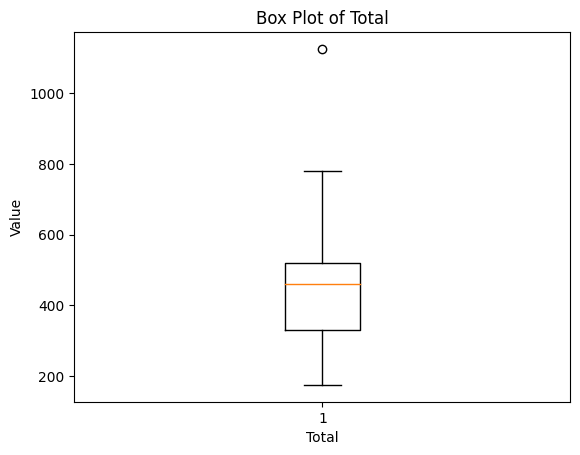

In [ ]:
plt.boxplot(df['Total'])
plt.xlabel('Total')
plt.ylabel('Value')
plt.title('Box Plot of Total')
plt.show()

# Total box plot từ nhỏ hơn 200~ 800 và có dữ liệu bất thường là Etemeus tận 1125

In [ ]:
df[df["Total"]>= 1000]

Name    Type  hasMegaEvolution  Total   HP  Attack  Defense  \
1059  Eternatus  Poison                 0   1125  255     115      250   

      Sp_Atk  Sp_Def  Speed  
1059     125     250    130

# Xây dựng mô hình

In [ ]:
scale = MinMaxScaler()

# Do phân phối dữ liệu chưa được chuẩn nên dùng Min Max Scaler sẽ tốt hơn so với standardscaler

In [ ]:
df_new =df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
df_new

# CHuẩn bị dữ liệu để model

HP  Attack  Defense  Sp_Atk  Sp_Def  Speed
1      45      49       49      65      65     45
2      60      62       63      80      80     60
3      80      82       83     100     100     80
4      80     100      123     122     120     80
5      39      52       43      60      50     65
...   ...     ...      ...     ...     ...    ...
1191   74     130       90     120      60    116
1192  100     135      115      85     100    135
1193  100      85      100     135     115    135
1194   99      83       91     125      83    109
1195   90     130       88      70     108    104

[1195 rows x 6 columns]

In [ ]:
df_new[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]= scale.fit_transform(df_new[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])

<ipython-input-61-e43a17c84fbb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

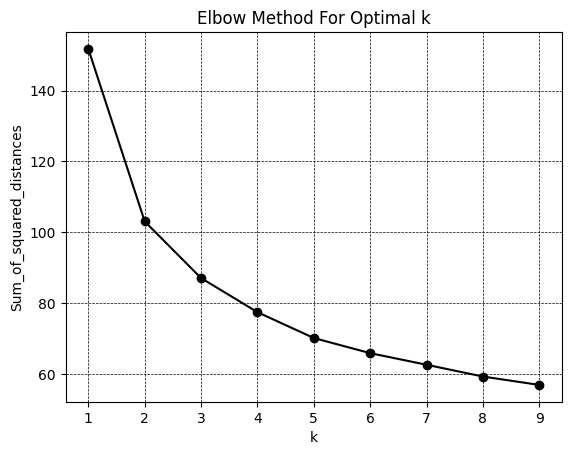

In [ ]:
from sklearn.cluster import KMeans
K = range(1,10)
Sum_of_squared_distances = []

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_new)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, color='black', marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True, linestyle='--', linewidth=0.5, color='black')
plt.show()

# Vẽ biểu đồ elbow method dựa trên kmean

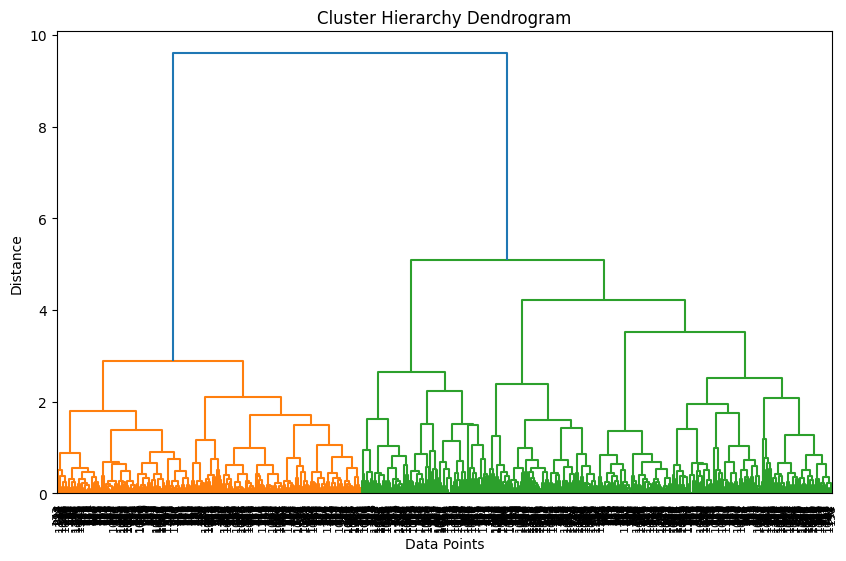

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_new, method='ward')

plt.figure(figsize=(10, 6))
plt.title('Cluster Hierarchy Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# Nhìn biểu đồ dendrogram và elbow ta thấy có thể chia làm 2 nhóm chính, tuy nhiên để có thể khám phá nhiều hơn ta có thể chia ra làm 3 nhóm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

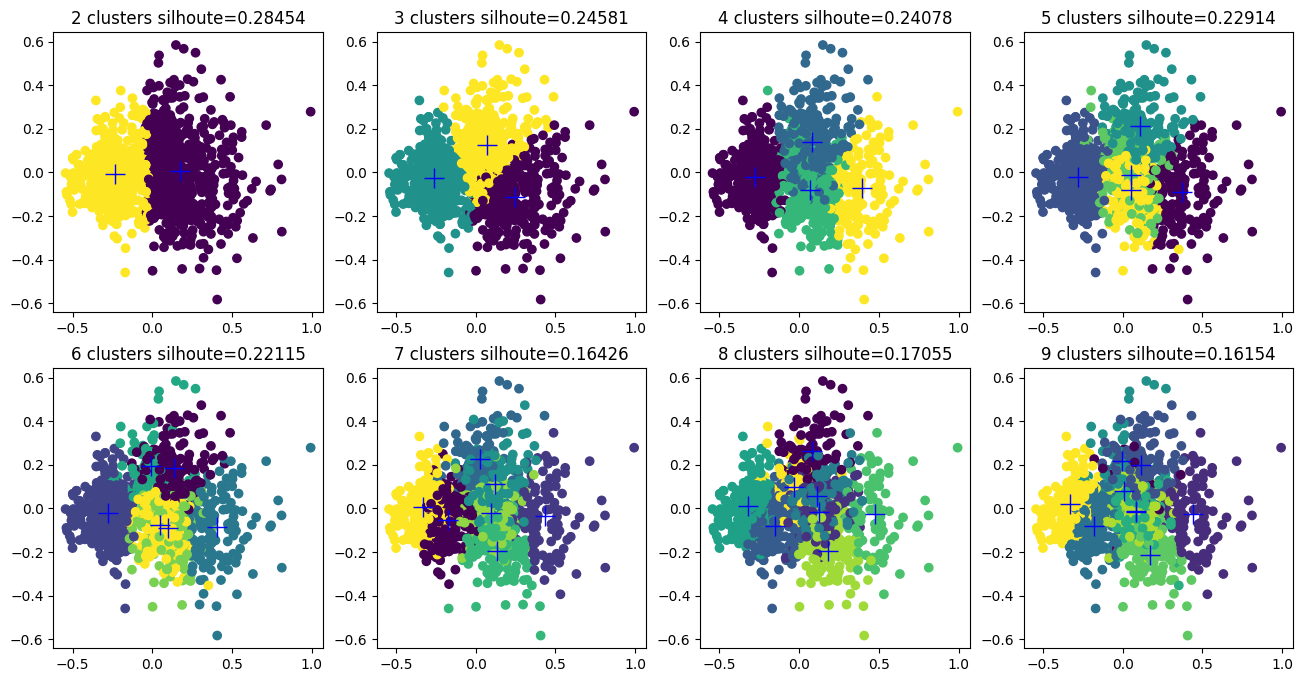

In [ ]:
from sklearn.decomposition import PCA
plt.figure(figsize=(16, 8))
data = df_new.values
data2d = PCA(n_components=2).fit_transform(data)
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred)

    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

# Thực hiện Kmean từ  2 ~9 rồi dùng silhoute để tính toán điểm

In [ ]:
# Lựa chọn Kmeans bằng 3 để tiến hành phân cụm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_new)

# Thâm cột phâm cụm vào trong cột df
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



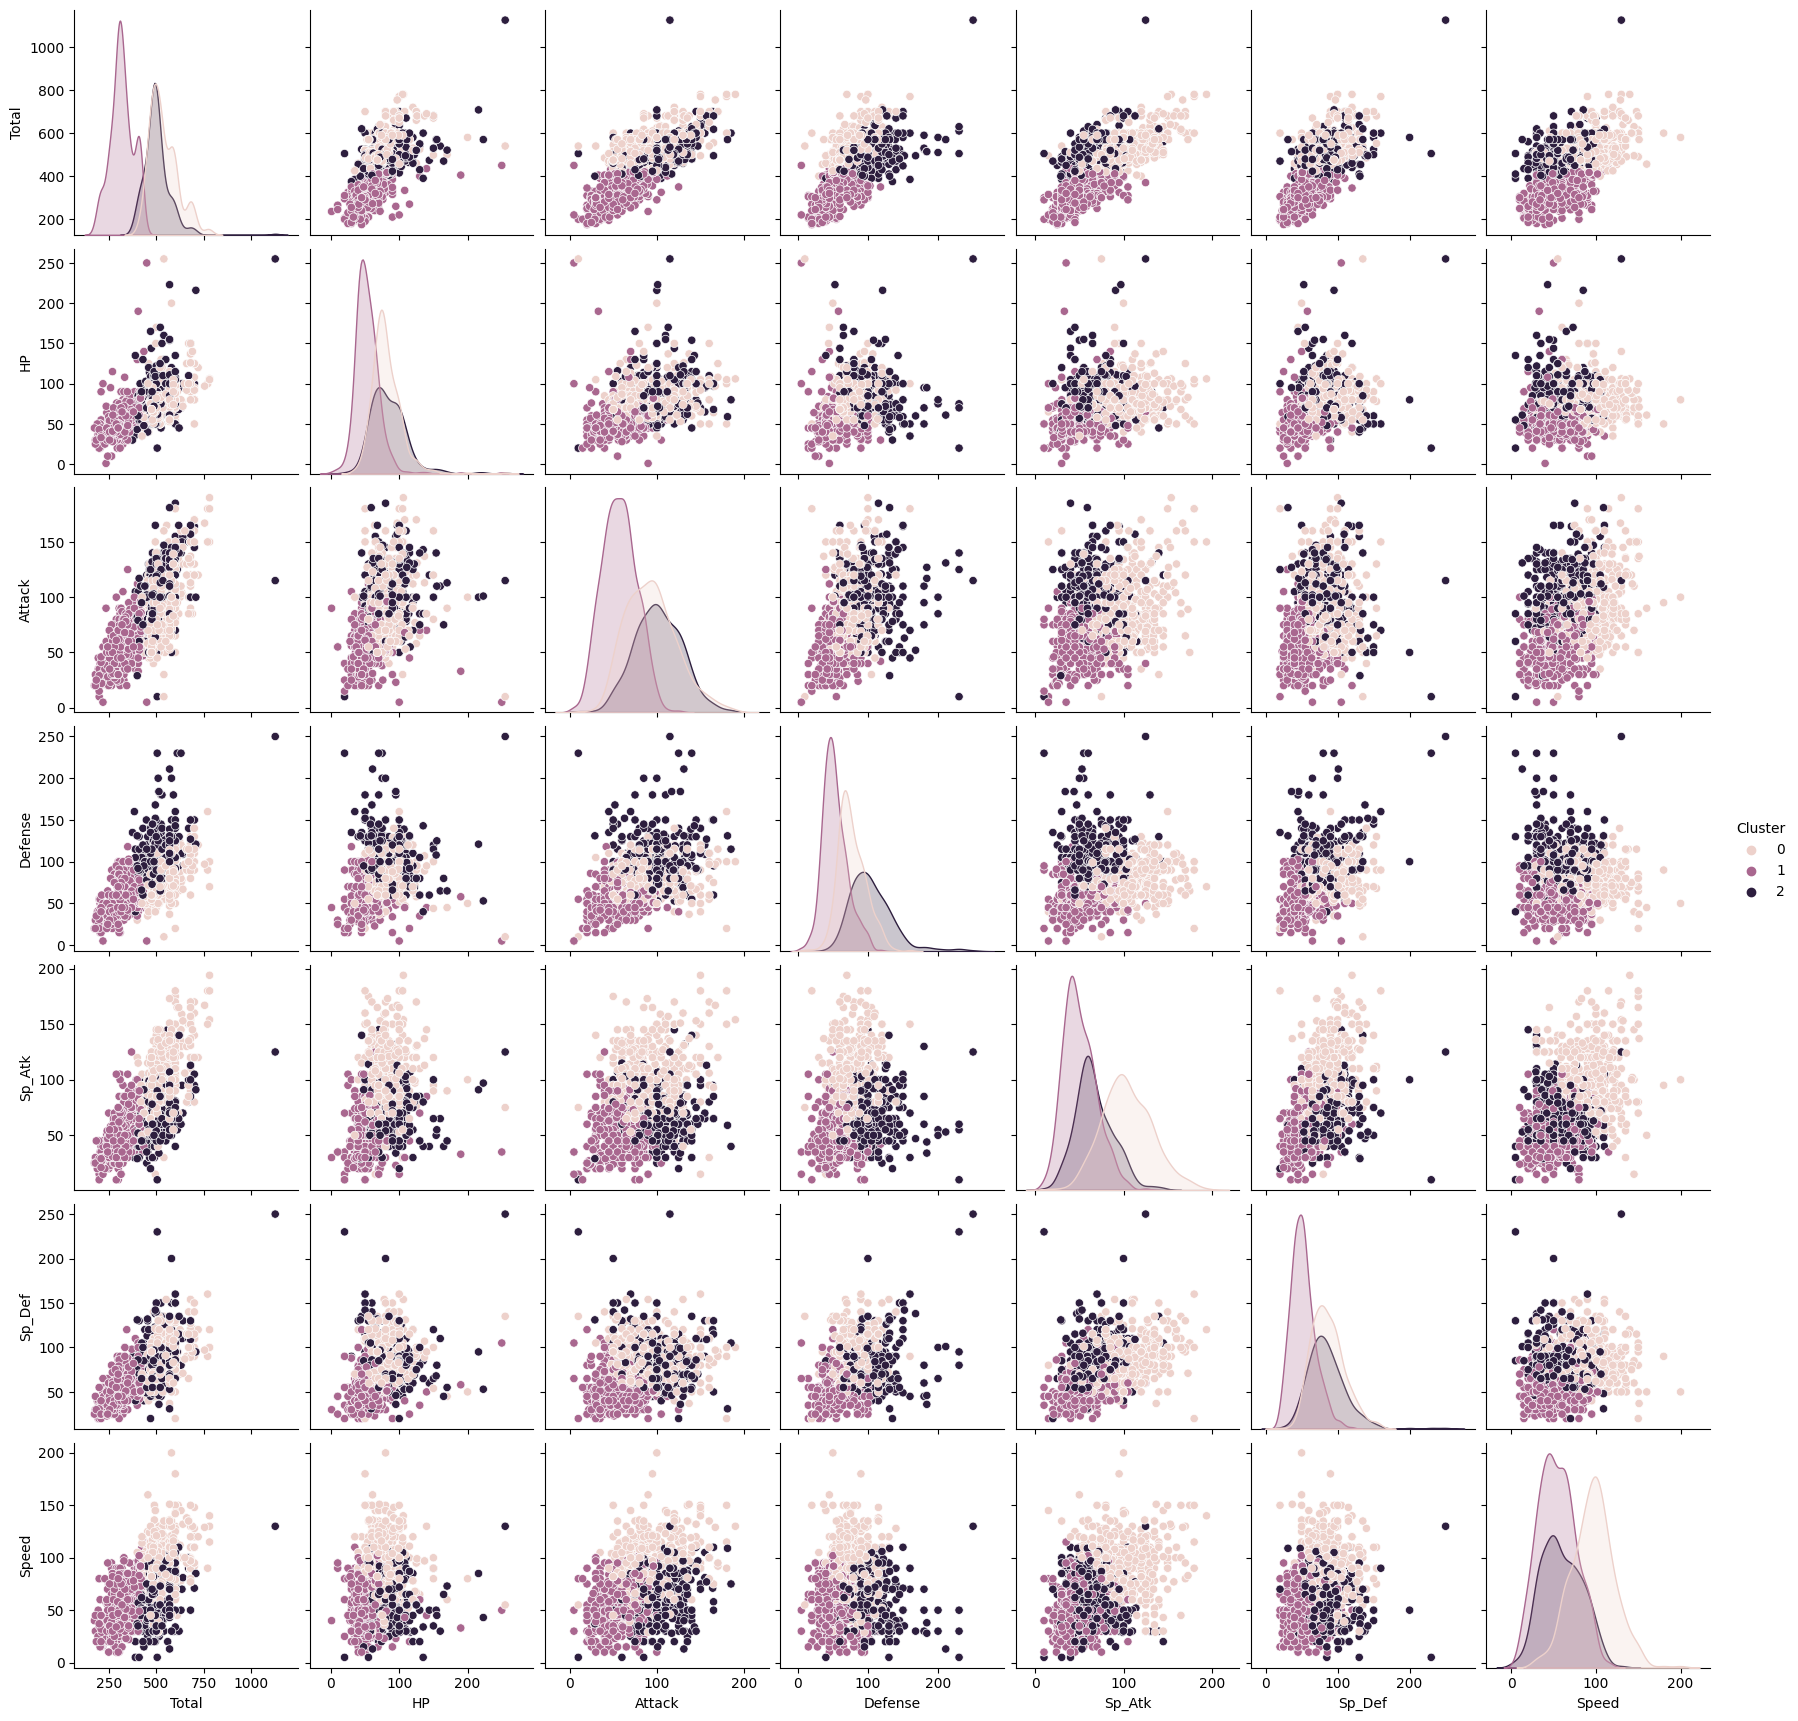

In [ ]:
sns.pairplot(df[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Cluster']], hue='Cluster')

In [ ]:
df2 = df[['HP', 'Attack', 'Defense', 'Speed', 'Sp_Atk', 'Sp_Def','Cluster']]

In [ ]:
df2[df2['Cluster'] == 0].describe()

HP      Attack     Defense       Speed      Sp_Atk      Sp_Def  \
count  407.000000  407.000000  407.000000  407.000000  407.000000  407.000000   
mean    80.990172   93.405405   76.975430   96.184275  104.071253   86.132678   
std     21.937886   29.299797   19.805318   25.092007   28.312077   22.851353   
min     35.000000   10.000000   10.000000   29.000000   15.000000   20.000000   
25%     69.500000   70.000000   65.000000   80.000000   85.000000   70.000000   
50%     78.000000   92.000000   75.000000   97.000000  100.000000   85.000000   
75%     90.500000  111.000000   90.000000  110.000000  125.000000  100.000000   
max    255.000000  190.000000  160.000000  200.000000  194.000000  160.000000   

       Cluster  
count    407.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [ ]:
df2[df2['Cluster'] == 1].describe()

HP      Attack     Defense       Speed      Sp_Atk      Sp_Def  \
count  474.000000  474.000000  474.000000  474.000000  474.000000  474.000000   
mean    53.198312   56.782700   52.597046   53.875527   50.409283   51.599156   
std     19.500060   19.584944   17.526545   21.705391   18.563336   16.640830   
min      1.000000    5.000000    5.000000   10.000000   10.000000   20.000000   
25%     40.000000   43.250000   40.000000   38.000000   37.250000   40.000000   
50%     50.000000   55.000000   50.000000   51.000000   48.500000   50.000000   
75%     60.000000   70.000000   62.000000   70.000000   62.000000   60.000000   
max    250.000000  125.000000  118.000000  115.000000  125.000000  120.000000   

       Cluster  
count    474.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

In [ ]:
df2[df2['Cluster'] == 2].describe()

HP      Attack     Defense       Speed      Sp_Atk      Sp_Def  \
count  314.000000  314.000000  314.000000  314.000000  314.000000  314.000000   
mean    84.614650  101.248408  104.831210   59.515924   66.573248   84.926752   
std     27.592677   27.229508   31.041045   23.526372   21.410398   27.499249   
min     20.000000   10.000000   40.000000    5.000000   10.000000   20.000000   
25%     65.000000   81.000000   82.250000   40.000000   53.000000   68.000000   
50%     80.000000  100.000000  100.000000   56.500000   65.000000   80.000000   
75%    100.000000  120.000000  120.000000   76.750000   80.000000   99.750000   
max    255.000000  185.000000  250.000000  130.000000  145.000000  250.000000   

       Cluster  
count    314.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0

In [ ]:
# df2[df2['Cluster'] == 3].describe()

HP  Attack  Defense  Speed  Sp_Atk  Sp_Def  Cluster
count  0.0     0.0      0.0    0.0     0.0     0.0      0.0
mean   NaN     NaN      NaN    NaN     NaN     NaN      NaN
std    NaN     NaN      NaN    NaN     NaN     NaN      NaN
min    NaN     NaN      NaN    NaN     NaN     NaN      NaN
25%    NaN     NaN      NaN    NaN     NaN     NaN      NaN
50%    NaN     NaN      NaN    NaN     NaN     NaN      NaN
75%    NaN     NaN      NaN    NaN     NaN     NaN      NaN
max    NaN     NaN      NaN    NaN     NaN     NaN      NaN

In [ ]:
# df2[df2['Cluster'] == 4].describe()

HP      Attack     Defense       Speed      Sp_Atk      Sp_Def  \
count  121.000000  121.000000  121.000000  121.000000  121.000000  121.000000   
mean    65.876033   93.314050  125.958678   48.090909   60.975207   86.033058   
std     14.884875   28.767758   30.537790   19.906866   20.620969   31.170481   
min     20.000000   10.000000   80.000000    5.000000   10.000000   20.000000   
25%     58.000000   78.000000  103.000000   35.000000   50.000000   65.000000   
50%     65.000000   95.000000  120.000000   45.000000   58.000000   80.000000   
75%     75.000000  110.000000  140.000000   64.000000   70.000000  100.000000   
max    100.000000  185.000000  230.000000   99.000000  140.000000  230.000000   

       Cluster  
count    121.0  
mean       4.0  
std        0.0  
min        4.0  
25%        4.0  
50%        4.0  
75%        4.0  
max        4.0

In [ ]:
# df2[df2['Cluster'] == 5].describe()

HP      Attack     Defense       Speed      Sp_Atk      Sp_Def  \
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000   
mean    92.750000  123.963235   96.889706  106.852941  116.588235   95.897059   
std     24.130126   26.032574   25.601989   22.114359   29.821312   25.789541   
min     50.000000   65.000000   20.000000   30.000000   54.000000   20.000000   
25%     79.000000  103.000000   80.000000   94.250000   95.000000   80.000000   
50%     91.500000  120.000000   95.000000  101.500000  120.000000   95.000000   
75%    100.000000  141.250000  110.000000  120.250000  135.500000  107.250000   
max    255.000000  190.000000  250.000000  180.000000  194.000000  250.000000   

       Cluster  
count    136.0  
mean       5.0  
std        0.0  
min        5.0  
25%        5.0  
50%        5.0  
75%        5.0  
max        5.0

In [ ]:
cluster_0_description = df2[df2['Cluster'] == 0].describe()
cluster_0_mean = cluster_0_description.loc['mean']
df_cluster_0_mean = cluster_0_mean.to_frame()
df_cluster_0_mean = df_cluster_0_mean.transpose()
df_cluster_0_mean

HP     Attack   Defense      Speed      Sp_Atk     Sp_Def  \
mean  80.990172  93.405405  76.97543  96.184275  104.071253  86.132678   

      Cluster  
mean      0.0

In [ ]:
cluster_1_description = df2[df2['Cluster'] == 1].describe()
cluster_1_mean = cluster_1_description.loc['mean']
df_cluster_1_mean = cluster_1_mean.to_frame()
df_cluster_1_mean = df_cluster_1_mean.transpose()
df_cluster_1_mean

HP   Attack    Defense      Speed     Sp_Atk     Sp_Def  Cluster
mean  53.198312  56.7827  52.597046  53.875527  50.409283  51.599156      1.0

In [ ]:
cluster_2_description = df2[df2['Cluster'] == 2].describe()
cluster_2_mean = cluster_2_description.loc['mean']
df_cluster_2_mean = cluster_2_mean.to_frame()
df_cluster_2_mean = df_cluster_2_mean.transpose()
df_cluster_2_mean

HP      Attack    Defense      Speed     Sp_Atk     Sp_Def  \
mean  84.61465  101.248408  104.83121  59.515924  66.573248  84.926752   

      Cluster  
mean      2.0

In [ ]:
# cluster_3_description = df2[df2['Cluster'] == 3].describe()
# cluster_3_mean = cluster_3_description.loc['mean']
# df_cluster_3_mean = cluster_3_mean.to_frame()
# df_cluster_3_mean = df_cluster_3_mean.transpose()
# df_cluster_3_mean

HP     Attack    Defense      Speed      Sp_Atk     Sp_Def  \
mean  74.677852  69.489933  80.214765  75.671141  107.281879  105.14094   

      Cluster  
mean      3.0

In [ ]:
# cluster_4_description = df2[df2['Cluster'] == 4].describe()
# cluster_4_mean = cluster_4_description.loc['mean']
# df_cluster_4_mean = cluster_4_mean.to_frame()
# # df_cluster_4_mean = df_cluster_4_mean.transpose()
# df_cluster_4_mean

HP    Attack     Defense      Speed     Sp_Atk     Sp_Def  \
mean  65.876033  93.31405  125.958678  48.090909  60.975207  86.033058   

      Cluster  
mean      4.0

In [ ]:
# cluster_5_description = df2[df2['Cluster'] == 5].describe()
# cluster_5_mean = cluster_5_description.loc['mean']
# df_cluster_5_mean = cluster_5_mean.to_frame()
# df_cluster_5_mean = df_cluster_5_mean.transpose()
# df_cluster_5_mean

HP      Attack    Defense       Speed      Sp_Atk     Sp_Def  Cluster
mean  92.75  123.963235  96.889706  106.852941  116.588235  95.897059      5.0

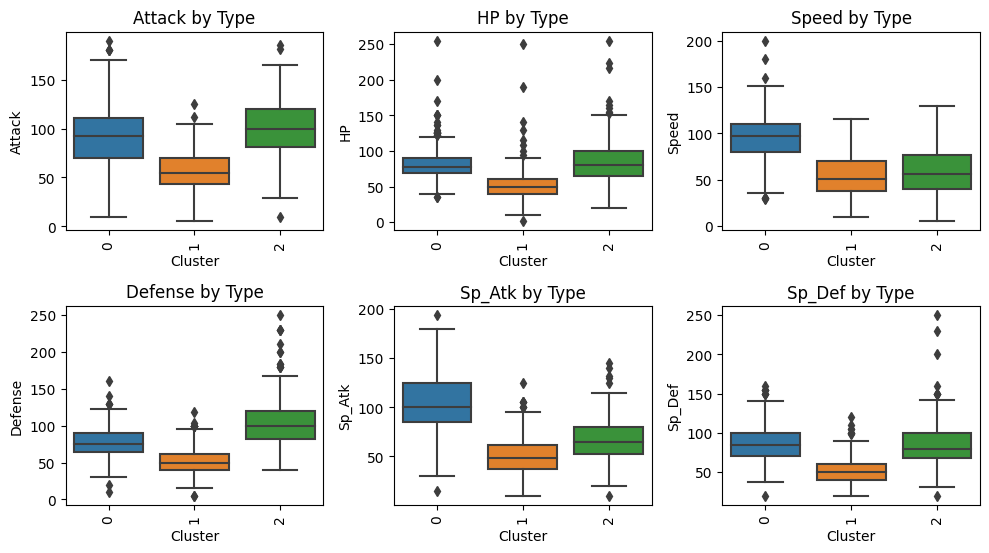

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
sns.boxplot(data=df2, x='Cluster', y='Attack')
plt.title('Attack by Type')
plt.xticks(rotation=90)

plt.subplot(3, 3, 2)
sns.boxplot(data=df2, x='Cluster', y='HP')
plt.title('HP by Type')
plt.xticks(rotation=90)

plt.subplot(3, 3, 3)
sns.boxplot(data=df2, x='Cluster', y='Speed')
plt.title('Speed by Type')
plt.xticks(rotation=90)

plt.subplot(3, 3, 4)
sns.boxplot(data=df2, x='Cluster', y='Defense')
plt.title('Defense by Type')
plt.xticks(rotation=90)

plt.subplot(3, 3, 5)
sns.boxplot(data=df2, x='Cluster', y='Sp_Atk')
plt.title('Sp_Atk by Type')
plt.xticks(rotation=90)

plt.subplot(3, 3, 6)
sns.boxplot(data=df2, x='Cluster', y='Sp_Def')
plt.title('Sp_Def by Type')
plt.xticks(rotation=90)


plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplot
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



# Cluster 0
selected_pokemon_0 = df_cluster_0_mean

categories = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

df_0 = pd.DataFrame(dict(
    r=selected_pokemon_0[categories].values[0],
    theta=categories))
fig = px.line_polar(df_0, r='r', theta='theta', line_close=True, range_r=[0, 150])
fig.update_traces(fill='toself',line_color='blue')

fig.show()


# Cluster 1
selected_pokemon_1 = df_cluster_1_mean
df_1 = pd.DataFrame(dict(
    r=selected_pokemon_1[categories].values[0],
    theta=categories))
fig = px.line_polar(df_1, r='r', theta='theta', line_close=True, range_r=[0, 150])
fig.update_traces(fill='toself',line_color='purple')

fig.show()

# Cluster 2
selected_pokemon_2 = df_cluster_2_mean

df_2 = pd.DataFrame(dict(
    r=selected_pokemon_2[categories].values[0],
    theta=categories))

fig = px.line_polar(df_2, r='r', theta='theta', line_close=True, range_r=[0, 150])
fig.update_traces(fill='toself',line_color='purple')

fig.show()




In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=1010).fit(df_new)
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Thử sử dụng DBScan tuy nhiên thấy nó phân cụm không rõ ràng, có thể thử thêm các biến khác như legendary, giới tính,

Estimated number of clusters: 0
Estimated number of noise points: 1195


In [ ]:
# Xuất csv file
df.to_csv('pokemon.csv', index=False)